# Kelionių duomenų rinkinys (Travel Dataset - Datathon 2019)

https://www.kaggle.com/datasets/leomauro/argodatathon2019?select=flights.csv

Paanalizuosime pateiktus duomenis iš Argo Solutions – pirmaujančios technologijų įmonės Lotynų Amerikoje.
Duomenų rinkinys imituoja realias verslo kelionių sistemas – daugiausia dėmesio skiriant skrydžiams ir viešbučiams.

Šiame „ dataset“ informacija pateikiama per trys lenteles – skrydžių, viešbučių ir keleivių informacija. Kiekvieną lentelę paanalizuosime skirtingais pjūviais, kad gautume tikslias išvados pagal išsikeltus klausimus.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_theme(style="ticks", color_codes=True)

Skrydžiai

In [3]:
df_flights = pd.read_csv('flights.csv')

In [4]:
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [7]:
df_flights.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [8]:
len(df_flights)

271888

In [9]:
# Kokios yra vidutinės skrydziu kainos iš kiekvieno oro uosto? 

df_flights.groupby(['from'])[['price']].mean().sort_values('price', ascending=False)

,price
from,
Salvador (BH),1094.492149
Sao Paulo (SP),988.165039
Brasilia (DF),981.951744
Aracaju (SE),959.837638
Campo Grande (MS),957.093465
Florianopolis (SC),933.999982
Rio de Janeiro (RJ),930.608064
Recife (PE),923.712255
Natal (RN),911.355506


In [185]:
# Iš kokio oro uosto yra brangiasia skristi skristi? Ir į kokį?

In [10]:
max_price = df_flights['price'].max()
max_price

1754.17

In [11]:
from_to = df_flights[df_flights['price'] == 1754.17]

In [12]:
from_to.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
93028,46514,453,Campo Grande (MS),Rio de Janeiro (RJ),firstClass,1754.17,2.09,806.48,Rainbow,02/20/2020
93034,46517,453,Campo Grande (MS),Rio de Janeiro (RJ),firstClass,1754.17,2.09,806.48,Rainbow,03/12/2020
93118,46559,453,Campo Grande (MS),Rio de Janeiro (RJ),firstClass,1754.17,2.09,806.48,Rainbow,12/31/2020
93214,46607,453,Campo Grande (MS),Rio de Janeiro (RJ),firstClass,1754.17,2.09,806.48,Rainbow,12/02/2021
93312,46656,454,Campo Grande (MS),Rio de Janeiro (RJ),firstClass,1754.17,2.09,806.48,Rainbow,12/05/2019


In [13]:
from_to['from'].value_counts()

Campo Grande (MS)    316
Name: from, dtype: int64

In [14]:
print(f'Barningiausio maršruto kaina yra {max_price} $ ir tas maršrutas yra iš Campo Grande (MS) į Rio de Janeiro (RJ).')

Barningiausio maršruto kaina yra 1754.17 $ ir tas maršrutas yra iš Campo Grande (MS) į Rio de Janeiro (RJ).


In [100]:
# Iš kokio oro uosto yra pigiausia skristi skristi? Ir į kokį?

In [15]:
min_price = df_flights['price'].min()
min_price

301.51

In [16]:
from_to2 = df_flights[df_flights['price'] == 301.51]
from_to2

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
34,17,0,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,01/23/2020
208,104,2,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,11/28/2019
246,123,2,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,04/09/2020
610,305,3,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,04/01/2021
802,401,3,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,02/02/2023
...,...,...,...,...,...,...,...,...,...,...
178501,89250,881,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,05/03/2020
178935,89467,882,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,12/11/2021
178955,89477,882,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,02/19/2022
179141,89570,884,Recife (PE),Natal (RN),economic,301.51,0.58,222.67,CloudFy,03/08/2020


In [17]:
from_to2['from'].value_counts()

Recife (PE)    410
Name: from, dtype: int64

In [18]:
print(f'Barningiausio maršruto kaina yra {min_price} $ ir tas maršrutas yra iš Recife (PE) į Natal (RN).')

Barningiausio maršruto kaina yra 301.51 $ ir tas maršrutas yra iš Recife (PE) į Natal (RN).


In [20]:
price_mean_one = df_flights['price'].mean()
price_mean_one


print(f'Vidutinė skrydžio kaina {price_mean_one} $.')

Vidutinė skrydžio kaina 957.3750299387224 $.


Text(0.5, 1.0, 'Vidutinė skrydžio kaina')

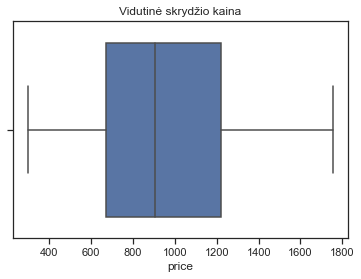

In [21]:
sns.boxplot(x = df_flights['price'])

plt.title('Vidutinė skrydžio kaina')

[Text(0.5, 0, 'Vidutinės bilieto kainos'),
 Text(0, 0.5, 'Skrydžiai iš oro uosto')]

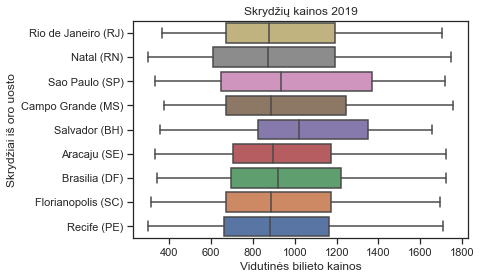

In [22]:
price_mean = sns.boxplot(x='price', y='from', data=df_flights)

plt.title('Skrydžių kainos 2019')

price_mean.invert_yaxis()
price_mean.set(xlabel='Vidutinės bilieto kainos', ylabel='Skrydžiai iš oro uosto')

In [23]:
# Kurie maršrutai daugiausia sugeneruoja pajamų?

df_flights['from_to'] = df_flights['from'] + '-' + df_flights['to']

In [5]:
df_flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,from_to
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC)
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE)
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC)
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF)
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH)


In [24]:
flitght_price = df_flights.groupby(['from_to'])[['price']].sum()
flitght_price

,price
from_to,
Aracaju (SE)-Brasilia (DF),3680969.82
Aracaju (SE)-Campo Grande (MS),6000457.28
Aracaju (SE)-Florianopolis (SC),10651992.54
Aracaju (SE)-Natal (RN),1905935.86
Aracaju (SE)-Recife (PE),4373283.11
...,...
Sao Paulo (SP)-Florianopolis (SC),9275379.28
Sao Paulo (SP)-Natal (RN),1393415.92
Sao Paulo (SP)-Recife (PE),3582215.00


In [25]:
top5_flitght = flitght_price.sort_values('price', ascending=False)[:5]
top5_flitght

,price
from_to,
Florianopolis (SC)-Aracaju (SE),10772400.66
Aracaju (SE)-Florianopolis (SC),10651992.54
Brasilia (DF)-Florianopolis (SC),9803492.15
Sao Paulo (SP)-Florianopolis (SC),9275379.28
Campo Grande (MS)-Florianopolis (SC),9134031.93


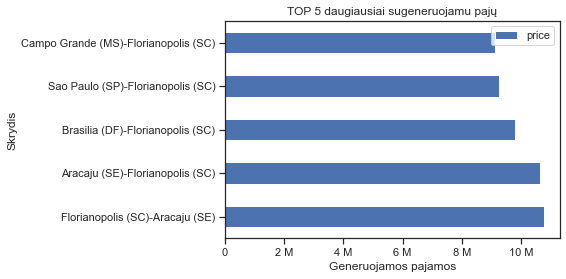

In [26]:
ax = top5_flitght.plot(kind='barh', stacked=True, figsize=(6,4))


plt.title('TOP 5 daugiausiai sugeneruojamu pajų')


ax.set(xlabel='Generuojamos pajamos', ylabel='Skrydis')

ax.xaxis.set_major_formatter(ticker.EngFormatter())

In [27]:
# Galime pamatyti, kiek procentų visu skrydžiu sudaro iš konkretaus miesto.

df_flights['from'].value_counts(normalize=True) * 100

Florianopolis (SC)     21.081107
Aracaju (SE)           13.690932
Campo Grande (MS)      12.780262
Brasilia (DF)          11.320470
Recife (PE)            11.210498
Natal (RN)              8.752133
Sao Paulo (SP)          8.689240
Salvador (BH)           6.290826
Rio de Janeiro (RJ)     6.184532
Name: from, dtype: float64

Viešbučiai

In [48]:
df_hotels = pd.read_csv('hotels.csv')
df_hotels

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020


In [29]:
# Kokios yra vidutinės viešbučių kainos kieviename mieste vienos nakties?

df_hotels.groupby(['name', 'place'])[['price']].mean().sort_values('price', ascending=False)

,,price
name,place,
Hotel A,Florianopolis (SC),313.02
Hotel AU,Recife (PE),312.83
Hotel K,Salvador (BH),263.41
Hotel BP,Brasilia (DF),247.62
Hotel BD,Natal (RN),242.88
Hotel Z,Aracaju (SE),208.04
Hotel CB,Rio de Janeiro (RJ),165.99
Hotel AF,Sao Paulo (SP),139.10
Hotel BW,Campo Grande (MS),60.39


<AxesSubplot:xlabel='price'>

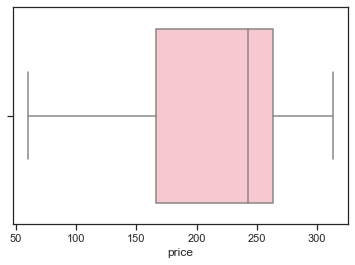

In [30]:
sns.boxplot(x = df_hotels['price'], color='pink')

In [31]:
# Kuries viešbutis sugeneruoja daugiausia pajamų?

df_hotels.groupby(['name', 'place'])[['price']].sum().sort_values('price', ascending=False)

,,price
name,place,
Hotel AU,Recife (PE),1397411.61
Hotel K,Salvador (BH),1341810.54
Hotel BD,Natal (RN),1172867.52
Hotel BP,Brasilia (DF),1098689.94
Hotel A,Florianopolis (SC),1042356.60
Hotel Z,Aracaju (SE),874808.20
Hotel CB,Rio de Janeiro (RJ),834763.71
Hotel AF,Sao Paulo (SP),671574.80
Hotel BW,Campo Grande (MS),261669.87


In [32]:
# Kuriame viešbutyje daugiausiai lankėsi klientų?

df_hotels.groupby(['name', 'place'])[['price']].count().sort_values('price', ascending=False)

,,price
name,place,
Hotel K,Salvador (BH),5094
Hotel CB,Rio de Janeiro (RJ),5029
Hotel BD,Natal (RN),4829
Hotel AF,Sao Paulo (SP),4828
Hotel AU,Recife (PE),4467
Hotel BP,Brasilia (DF),4437
Hotel BW,Campo Grande (MS),4333
Hotel Z,Aracaju (SE),4205
Hotel A,Florianopolis (SC),3330


In [33]:
# Panalizuokime, kuris miestas sugeneruoja daugiausia pajamų iš skrydžių ir viešbučių?

hotel_place = df_hotels.groupby(['place'])[['price']].sum().sort_values('price', ascending=False)
flights_place = df_flights.groupby(['from'])[['price']].sum().sort_values('price', ascending=False)

In [34]:
hotel_place

,price
place,
Recife (PE),1397411.61
Salvador (BH),1341810.54
Natal (RN),1172867.52
Brasilia (DF),1098689.94
Florianopolis (SC),1042356.60
Aracaju (SE),874808.20
Rio de Janeiro (RJ),834763.71
Sao Paulo (SP),671574.80
Campo Grande (MS),261669.87


In [35]:
flights_place

,price
from,
Florianopolis (SC),53534076.95
Aracaju (SE),35728996.23
Campo Grande (MS),33257083.73
Brasilia (DF),30223492.73
Recife (PE),28154749.54
Sao Paulo (SP),23345399.04
Natal (RN),21686615.62
Salvador (BH),18720193.71
Rio de Janeiro (RJ),15648174.59


In [36]:
total_price = hotel_place + flights_place
total_price.sort_values('price', ascending=False)

,price
Florianopolis (SC),54576433.55
Aracaju (SE),36603804.43
Campo Grande (MS),33518753.60
Brasilia (DF),31322182.67
Recife (PE),29552161.15
Sao Paulo (SP),24016973.84
Natal (RN),22859483.14
Salvador (BH),20062004.25
Rio de Janeiro (RJ),16482938.30


In [42]:
total_price = pd.read_csv('total_price.csv')
total_price.sort_values('total_price', ascending=False)

,Place,hotel_price,flights_price,total_price
4,Florianopolis (SC),1042356.60,53534076.95,54576433.55
5,Aracaju (SE),874808.20,35728996.23,36603804.43
8,Campo Grande (MS),261669.87,33257083.73,33518753.60
3,Brasilia (DF),1098689.94,30223492.73,31322182.67
0,Recife (PE),1397411.61,28154749.54,29552161.15
7,Sao Paulo (SP),671574.80,23345399.04,24016973.84
2,Natal (RN),1172867.52,21686615.62,22859483.14
1,Salvador (BH),1341810.54,18720193.71,20062004.25
6,Rio de Janeiro (RJ),834763.71,15648174.59,16482938.30


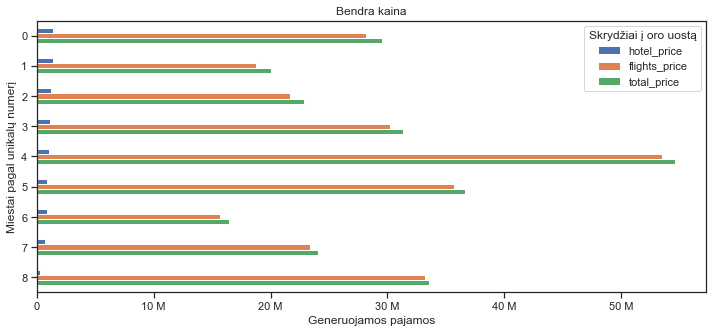

In [270]:
price = total_price.plot(kind='barh', figsize=(12,5))

plt.title('Bendra kaina')

price.invert_yaxis()
price.set(xlabel='Generuojamos pajamos', ylabel='Miestai pagal unikalų numerį')
price.legend(title='Skrydžiai į oro uostą')
price.xaxis.set_major_formatter(ticker.EngFormatter())

Keleiviai

In [49]:
df_users = pd.read_csv('users_su_userCode.csv')
df_users

,userCode,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [286]:
df_users.isnull().sum()

userCode    0
company     0
name        0
gender      0
age         0
dtype: int64

In [290]:
# Kurių klientų daugiau pagal lytį naudojasi skrydžio ir viešbučio paslaugomis?

df_users.groupby(['gender'])[['userCode']].count().sort_values('userCode', ascending=False)

,userCode
gender,
male,452
female,448
none,440


In [291]:
# Kurių klientų daugiau pagal lytį dirba toje pačioje kompanijoje?

df_users.groupby(['company', 'gender'])[['userCode']].count().sort_values('userCode', ascending=False)

userCode
company       gender          
4You          none         164
              female       151
              male         138
Acme Factory  male          93
Wonka Company male          90
Acme Factory  female        85
              none          83
Wonka Company female        79
Monsters CYA  none          70
Umbrella LTDA male          70
              female        69
Wonka Company none          68
Monsters CYA  female        64
              male          61
Umbrella LTDA none          55

In [309]:
max_old = df_users['age'].max()
min_old = df_users['age'].min()
avg_old = df_users['age'].mean()

print(f'Vyriausiam klientui yra {max_old} metai.')
print(f'Jauniausiam klientui yra {min_old} metai.')
print(f'Vidutinis klientų amžius yra {avg_old} metai.')

Vyriausiam klientui yra 65 metai.
Jauniausiam klientui yra 21 metai.
Vidutinis klientų amžius yra 42.742537313432834 metai.


<AxesSubplot:xlabel='age'>

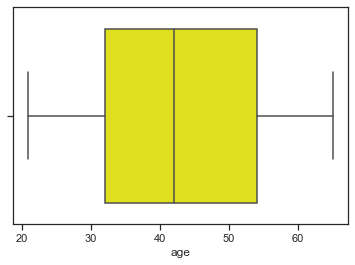

In [305]:
sns.boxplot(x = df_users['age'], color='yellow')

Klientai ir skrydžiai.

In [8]:
flights_users = df_flights.merge(df_users, how='inner', left_on='userCode', right_on='userCode')
flights_users

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,from_to,company,name,gender,age
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC),4You,Roy Braun,male,21
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE),4You,Roy Braun,male,21
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC),4You,Roy Braun,male,21
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF),4You,Roy Braun,male,21
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH),4You,Roy Braun,male,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Campo Grande (MS)-Florianopolis (SC),Umbrella LTDA,Paul Rodriguez,male,35
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Florianopolis (SC)-Natal (RN),Umbrella LTDA,Paul Rodriguez,male,35
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020,Natal (RN)-Florianopolis (SC),Umbrella LTDA,Paul Rodriguez,male,35
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020,Florianopolis (SC)-Rio de Janeiro (RJ),Umbrella LTDA,Paul Rodriguez,male,35


In [312]:
flights_users.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
from_to       0
company       0
name          0
gender        0
age           0
dtype: int64

In [315]:
# Jau žinome, kad vyrų klientų yra daugiau tik ar jie išleidžia daugiau pinigų skrydžiams?

flights_users.groupby(['gender'])[['price']].sum().sort_values('price', ascending=False)

,price
gender,
male,87686108.27
female,87604006.31
none,85008667.56


In [316]:
flights_users.groupby(['gender', 'company'])[['price']].sum().sort_values('price', ascending=False)

price
gender company                   
none   4You           31134947.09
female 4You           29106210.05
male   4You           26002660.55
       Acme Factory   19114257.00
female Acme Factory   18352686.51
none   Acme Factory   16169659.52
male   Wonka Company  15614767.99
       Umbrella LTDA  15468257.82
female Umbrella LTDA  14928879.11
       Wonka Company  14585328.83
none   Monsters CYA   13869254.02
       Umbrella LTDA  13529265.23
male   Monsters CYA   11486164.91
female Monsters CYA   10630901.81
none   Wonka Company  10305541.70

In [317]:
# Paskirstikime klientus pagal amžiaus grupes, kai jau žinome, kad vyriausiam klientui yra 65 metai,
# o jauniausiam klientui yra 21 metai.

In [50]:
def age_function(age):
    if age <= 30:
        return "21 - 30"
    elif age <= 40:
        return "31 - 40"
    elif age <= 50:
        return "41 - 50"
    elif age <= 60:
        return "51 - 60"
    else:
        return "61+"

In [16]:
age_function(21)

'21 - 30'

In [17]:
flights_users['age'].map(age_function)

0         21 - 30
1         21 - 30
2         21 - 30
3         21 - 30
4         21 - 30
           ...   
271883    31 - 40
271884    31 - 40
271885    31 - 40
271886    31 - 40
271887    31 - 40
Name: age, Length: 271888, dtype: object

In [18]:
flights_users['age index'] = flights_users['age'].map(age_function)
flights_users

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,from_to,company,name,gender,age,age index
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC),4You,Roy Braun,male,21,21 - 30
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE),4You,Roy Braun,male,21,21 - 30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC),4You,Roy Braun,male,21,21 - 30
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF),4You,Roy Braun,male,21,21 - 30
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH),4You,Roy Braun,male,21,21 - 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Campo Grande (MS)-Florianopolis (SC),Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Florianopolis (SC)-Natal (RN),Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020,Natal (RN)-Florianopolis (SC),Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020,Florianopolis (SC)-Rio de Janeiro (RJ),Umbrella LTDA,Paul Rodriguez,male,35,31 - 40


In [326]:
# Kuri amžiaus grupė išleidžia daugiausia pinigų lektuvo bilietams? 

flights_users.groupby(['age index'])[['price']].sum().sort_values('price', ascending=False)

,price
age index,
31 - 40,63817035.36
41 - 50,57227050.83
21 - 30,55530531.88
51 - 60,53899831.02
61+,29824333.05


In [331]:
# Nors šioje analizėje netikrinome apie lėktuvo klases, bet įdomu ar daugiausiai pinigų išleidžianti klientų grupė pagal
# amžių perka aukščiausios klasės bilietus?

flightType_p = flights_users.groupby(['age index', 'flightType'])[['price']].sum().sort_values('price', ascending=False)
flightType_p

,,price
age index,flightType,
31 - 40,firstClass,33611904.44
41 - 50,firstClass,30374628.44
21 - 30,firstClass,29448867.42
51 - 60,firstClass,28321031.21
31 - 40,premium,17627709.11
41 - 50,premium,15753682.63
61+,firstClass,15741111.16
21 - 30,premium,15130823.94
51 - 60,premium,15000899.80


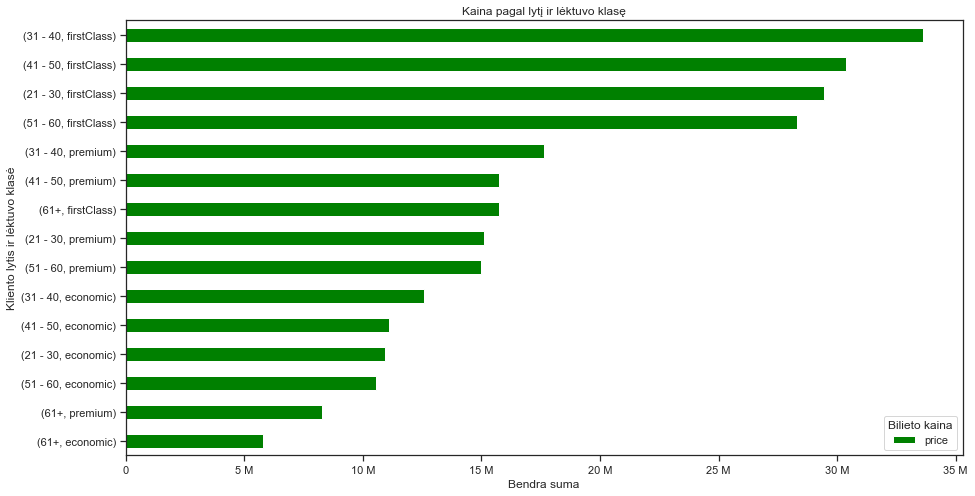

In [337]:
age_index = flightType_p.plot(kind='barh', figsize=(15,8), color = 'green')

plt.title('Kaina pagal lytį ir lėktuvo klasę')

age_index.invert_yaxis()
age_index.set(xlabel='Bendra suma', ylabel='Kliento lytis ir lėktuvo klasė')
age_index.legend(title='Bilieto kaina')
age_index.xaxis.set_major_formatter(ticker.EngFormatter())

In [347]:
# Taip pat įdomu kuri įmonė daugiausia pinigų išleidžia lėktuvo bilietams savo darbuotojams ir kuri lėktuvo klasė
# yra perkalmiausia?

flights_users.groupby(['company', 'flightType'])[['price']].sum().sort_values('price', ascending=False)

,,price
company,flightType,
4You,firstClass,46006432.30
Acme Factory,firstClass,28062956.89
4You,premium,23524837.24
Umbrella LTDA,firstClass,23224584.95
Wonka Company,firstClass,21216778.59
Monsters CYA,firstClass,18986789.94
4You,economic,16712548.15
Acme Factory,premium,14992490.80
Umbrella LTDA,premium,12164226.38


Klientai ir viešbučiai.

In [51]:
hotels_users = df_hotels.merge(df_users, how='inner', left_on='userCode', right_on='userCode')
hotels_users

,travelCode,userCode,name_x,place,days,price,total,date,company,name_y,gender,age
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,4You,Roy Braun,male,21
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019,4You,Roy Braun,male,21
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019,4You,Roy Braun,male,21
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019,4You,Roy Braun,male,21
...,...,...,...,...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020,Umbrella LTDA,Paul Rodriguez,male,35
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020,Umbrella LTDA,Paul Rodriguez,male,35
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020,Umbrella LTDA,Paul Rodriguez,male,35
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020,Umbrella LTDA,Paul Rodriguez,male,35


In [52]:
hotels_users['age index'] = hotels_users['age'].map(age_function)
hotels_users

,travelCode,userCode,name_x,place,days,price,total,date,company,name_y,gender,age,age index
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21,21 - 30
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,4You,Roy Braun,male,21,21 - 30
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019,4You,Roy Braun,male,21,21 - 30
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019,4You,Roy Braun,male,21,21 - 30
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019,4You,Roy Braun,male,21,21 - 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020,Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020,Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020,Umbrella LTDA,Paul Rodriguez,male,35,31 - 40
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020,Umbrella LTDA,Paul Rodriguez,male,35,31 - 40


In [340]:
# Kuri amžiaus grupė išleidžia daugiausia pinigų viešbučiams vienai nakčiai? 

hotels_users.groupby(['age index'])[['price']].sum().sort_values('price', ascending=False)

,price
age index,
31 - 40,2109379.60
41 - 50,1940448.86
21 - 30,1843090.80
51 - 60,1795172.64
61+,1007860.89


In [348]:
# Taip pat įdomu kuri įmonė daugiausia pinigų išleidžia viešbučiams (vienos nakties) savo darbuotojams?

hotels_users.groupby(['company'])[['price']].sum().sort_values('price', ascending=False)

,price
company,
4You,2978607.99
Acme Factory,1566651.61
Wonka Company,1466820.48
Monsters CYA,1404450.45
Umbrella LTDA,1279422.26


Išvados:

Išanalizavus duomenis apie skrydžius, viešbučius ir klientus galime pamatyti, kad brangiausias skrydžio maršrutas yra iš Campo Grande (MS) į Rio de Janeiro (RJ). O vidutinė skrydžio kaina 957.37 $. Maršrutas daugiausiai sugeneruojantis pajamų Florianopolis (SC)-Aracaju (SE). Bet viešbutis daugiausiai generuojantis pajamas - Hotel AU, o vieta - Recife (PE). O daugiausiai už skrydžius ir viešbučius uždirba Florianopolis (SC) miestas. Keleivių analizėje, galime pamatyti, kad skraidančių amžius yra nuo 21 iki 65 metų, o vidutinis amžius apie 42 metus. O amžiaus grupė kuri išleidžia daugiausia pinigų yra 31 -40 m. Ir galime pamatyti, kad daugiausia už savo darbuotojus sumoka įmonė “4You”.